# SWMAL Exercise

## Pipelines

We now try building af ML pipeline. The data for this exercise is the same as in L01, meaning that the OECD data from the 'intro.ipynb' have been save into a Python 'pickle' file. 

The pickle library is a nifty data preservation method in Python, and from L01 the tuple `(X, y)` have been stored to the pickle file `tmal_l01_data.pkl', try reloading it..

In [1]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def LoadDataFromL01():
    import pickle
    filename = "./itmal_l01_data.pkl"
    with open(f"{filename}", "rb") as f:
        (X, y) = pickle.load(f)
        return X, y

X, y = LoadDataFromL01()

print(f"X.shape={X.shape},  y.shape={y.shape}")

assert X.shape[0] == y.shape[0]
assert X.ndim == 2
assert y.ndim == 1  # did a y.ravel() before saving to picke file
assert X.shape[0] == 29

# re-create plot data (not stored in the Pickel file)
m = np.linspace(0, 60000, 1000)
M = np.empty([m.shape[0], 1])
M[:, 0] = m

print("OK")

X.shape=(29, 1),  y.shape=(29,)
OK


###  Revisiting the problem with the MLP

Using the MLP for the QECD data in Qd) from `intro.ipynb` produced a negative $R^2$, meaning that it was unable to fit the data, and the MPL model was actually _worse_ than the naive $\hat y$ (mean value of y).

Let's just revisit this fact. When running the next cell you should now see an OK $~R^2_{lin.reg}~$ score and a negative $~R^2_{mlp}~$ score..

The MLP may mis-fit the data, seen in the, sometimes, bad R^2 score..

lin.reg.score(X, y)=0.73
MLP    .score(X, y)=-8.85

OK


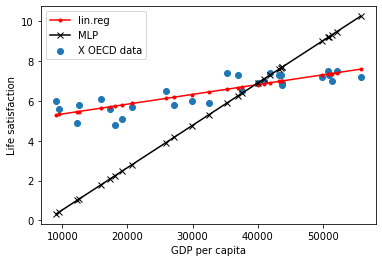

In [2]:
# Setup the MLP and lin. regression again..

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score

def PlotModels(model1, model2, X, y, name_model1="lin.reg", name_model2="MLP"):

    # NOTE: local function is such a nifty feature of Python!
    def CalcPredAndScore(model1, model2, X, y):
        y_pred_model1 = model1.predict(X)
        y_pred_model2 = model2.predict(X)

        # call r2
        score_model1 = r2_score(y, y_pred_model1)
        score_model2 = r2_score(y, y_pred_model2)

        return y_pred_model1, y_pred_model2, score_model1, score_model2
    
    def Fill(s, n):
        while(len(s)<n):
            s += " "
        return s

    y_pred_model1, y_pred_model2, score_model1, score_model2 = CalcPredAndScore(
        model1, model2, X, y)

    plt.plot(X, y_pred_model1, "r.-")
    plt.plot(X, y_pred_model2, "kx-")
    plt.scatter(X, y)
    plt.xlabel("GDP per capita")
    plt.ylabel("Life satisfaction")
    plt.legend([name_model1, name_model2, "X OECD data"])

    l = max(len(name_model1), len(name_model2))
    
    print(f"{Fill(name_model1,l)}.score(X, y)={score_model1:0.2f}")
    print(f"{Fill(name_model2,l)}.score(X, y)={score_model2:0.2f}")


# lets make a linear and MLP regressor and redo the plots

mlp = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)
linreg = LinearRegression()

mlp.fit(X, y)
linreg.fit(X, y)

print("The MLP may mis-fit the data, seen in the, sometimes, bad R^2 score..\n")
PlotModels(linreg, mlp, X, y)
print("\nOK")

### Qa) Create a Min/max scaler for the MLP

Now, the neurons in neural networks normally expect input data in the range `[0;1]` or sometimes in the range `[-1;1]`, meaning that for value outside this range then the neuron will saturate to its min or max value (also typical `0` or `1`). 

A concrete value of `X` is, say 22.000 USD, that is far away from what the MLP expects. Af fix to the problem in Qd), from `intro.ipynb`, is to preprocess data by scaling it down to something more sensible.

Try to manually scale X to a range of `[0;1]`, re-train the MLP, re-plot and find the new score from the rescaled input. Any better?

(If you already made exercise "Qe) Neural Network with pre-scaling" in L01, then reuse Your work here!) 

Iteration 1, loss = 18.28253901
Iteration 2, loss = 18.26565519
Iteration 3, loss = 18.24867758
Iteration 4, loss = 18.23196407
Iteration 5, loss = 18.21519929
Iteration 6, loss = 18.19834801
Iteration 7, loss = 18.18146241
Iteration 8, loss = 18.16446101
Iteration 9, loss = 18.14744640
Iteration 10, loss = 18.13041941
Iteration 11, loss = 18.11338060
Iteration 12, loss = 18.09633038
Iteration 13, loss = 18.07926690
Iteration 14, loss = 18.06206856
Iteration 15, loss = 18.04480362
Iteration 16, loss = 18.02742877
Iteration 17, loss = 18.01003203
Iteration 18, loss = 17.99261494
Iteration 19, loss = 17.97517874
Iteration 20, loss = 17.95760769
Iteration 21, loss = 17.93998657
Iteration 22, loss = 17.92234063
Iteration 23, loss = 17.90467142
Iteration 24, loss = 17.88698018
Iteration 25, loss = 17.86926789
Iteration 26, loss = 17.85153536
Iteration 27, loss = 17.83378321
Iteration 28, loss = 17.81590961
Iteration 29, loss = 17.79800074
Iteration 30, loss = 17.78006634
Iteration 31, loss 

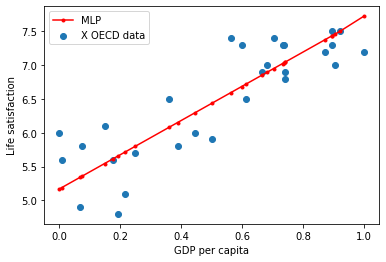

In [21]:
def PlotMLP(mlp, X, y):

    # NOTE: local function is such a nifty feature of Python!
    def CalcPredAndScore(mlp, X, y):
        y_pred_model1 = mlp.predict(X)

        # call r2
        score_model1 = r2_score(y, y_pred_model1)

        return y_pred_model1, score_model1

    y_pred_model1, score_model1 = CalcPredAndScore(
        mlp, X, y)

    plt.plot(X, y_pred_model1, "r.-")
    plt.scatter(X, y)
    plt.xlabel("GDP per capita")
    plt.ylabel("Life satisfaction")
    plt.legend(["MLP", "X OECD data"])
    
    print(f"MLP.score(X, y)={score_model1:0.2f}")

normalizedX = (X-min(X))/(max(X)-min(X))

# Setup MLPRegressor
mlp.fit(normalizedX, y)

# lets make a MLP regressor prediction and redo the plots

PlotMLP(mlp, normalizedX, y)

### Qb) Scikit-learn Pipelines

Now, rescale again, but use the `sklearn.preprocessing.MinMaxScaler`.

When this works put both the MLP and the scaler into a composite construction via `sklearn.pipeline.Pipeline`. This composite is just a new Scikit-learn estimator, and can be used just like any other `fit-predict` models, try it, and document it for the journal.

(You could reuse the `PlotModels()` function by also retraining the linear regressor on the scaled data, or just write your own plot code.)

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
M_scaled = scaler.transform(M)

mlp.fit(X_scaled, y)
y_pred_mlp = mlp.predict(M_scaled)

print(f"mlp.score={mlp.score(X_scaled, y):0.2f}")

Iteration 1, loss = 19.42339562
Iteration 2, loss = 19.39423028
Iteration 3, loss = 19.36508278
Iteration 4, loss = 19.33595344
Iteration 5, loss = 19.30684256
Iteration 6, loss = 19.27775039
Iteration 7, loss = 19.24867567
Iteration 8, loss = 19.21960129
Iteration 9, loss = 19.19054516
Iteration 10, loss = 19.16150760
Iteration 11, loss = 19.13248884
Iteration 12, loss = 19.10348908
Iteration 13, loss = 19.07450849
Iteration 14, loss = 19.04554720
Iteration 15, loss = 19.01660532
Iteration 16, loss = 18.98766703
Iteration 17, loss = 18.95873930
Iteration 18, loss = 18.92982942
Iteration 19, loss = 18.90093751
Iteration 20, loss = 18.87206368
Iteration 21, loss = 18.84320798
Iteration 22, loss = 18.81437042
Iteration 23, loss = 18.78555099
Iteration 24, loss = 18.75672912
Iteration 25, loss = 18.72790735
Iteration 26, loss = 18.69910061
Iteration 27, loss = 18.67030901
Iteration 28, loss = 18.64152294
Iteration 29, loss = 18.61271952
Iteration 30, loss = 18.58390099
Iteration 31, loss 

### Qc) Outliers and the Min-max Scaler vs. the Standard Scaler

Explain the fundamental problem with a min-max scaler and outliers. 

Will a `sklearn.preprocessing.StandardScaler` do better here, in the case of abnormal feature values/outliers?

In [ ]:
# TODO: research the problem here..
assert False, "TODO: investigate outlier problems and try a StandardScaler.."

### Qd) Modify the MLP Hyperparameters

Finally, try out some of the hyperparameters associated with the MLP.

Specifically, test how few neurons the MLP can do with---still producing a sensible output, i.e. high $R^2$. 

Also try-out some other activation functions, ala sigmoid, and solvers, like `sgd`.

Notice, that the Scikit-learn MLP does not have as many adjustable parameters, as a Keras MLP, for example, the Scikit-learn MLP misses neurons initialization parameters (p. 333-334 [HOML]) and the ELU activation function (p. 336 [HOML]).

OPTIONAL$_1$: use a Keras MLP regressor instead of the Scikit-learn MLP (You need to install the  Keras if its not installed as default).

OPTIONAL$_2$: try out the `early_stopping` hyperparameter on the `MLPRegressor`. 

OPTIONAL$_3$: try putting all score-calculations into K-fold cross-validation  methods readily available in Scikit-learn using

* `sklearn.model_selection.cross_val_predict`
* `sklearn.model_selection.cross_val_score` 

or similar (this is, in theory, the correct method, but can be hard to use due to the  extremely small number of data points, `n=29`).

In [ ]:
# TODO: add your code here..
assert False, "TODO: test out various hyperparameters for the MLP.."

REVISIONS||
---------||
2020-10-15| CEF, initial. 
2020-10-21| CEF, added Standard Scaler Q.
2020-11-17| CEF, removed orhpant text in Qa (moded to Qc).
2021-02-10| CEF, updated for ITMAL F21.
2021-11-08| CEF, updated print info.
2021-02.10| CEF, updated for SWMAL F22.
